"""
Edyta Bartoś, Marcin Grelewicz, 
Tensorflow Keras images classification

based on Tensorflow tutorial: https://www.tensorflow.org/tutorials/keras/classification

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. 
The labels are an array of integers, ranging from 0 to 9. 
These correspond to the class of clothing the image represents:
Label - Class
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot

Each image is mapped to a single label. 
The class names are not included with the dataset.
"""

In [5]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 3s 1us/step


In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape
#len(train_labels)
#train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape
#len(test_labels)
#test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

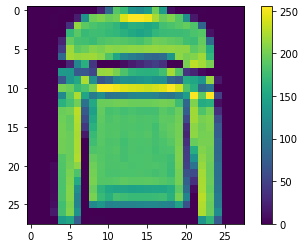

In [23]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

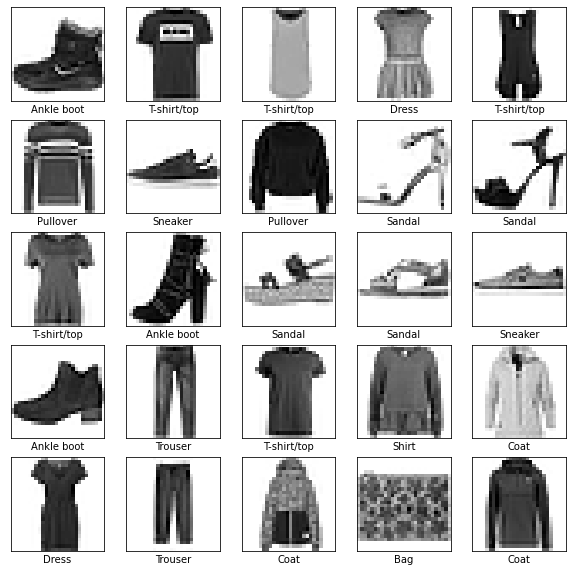

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4972 - accuracy: 0.8245: 1s - loss: 0.5747 - accuracy:  - ETA: 
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3748 - accuracy: 0.8646: 2s - los
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.3146 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2968 - accuracy: 0.8902: 1s - l - ETA: 0s - l
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.2691 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.2582 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.2490 - accuracy: 0.9062
Ep

Evaluate accuracy

Compare how the model performs on the test dataset:

In [32]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3290 - accuracy: 0.8867

Test accuracy: 0.8866999745368958


Make predictions:

In [33]:
##Attaching a softmax layer to convert the logits to probabilities, which are easier to interpret
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [34]:
predictions = probability_model.predict(test_images)

In [35]:
#Here, the model has predicted the label for each image in the testing set. 
#Let's take a look at the first prediction:

predictions[0]

array([1.5417956e-07, 1.5863977e-08, 3.0675412e-08, 2.6093836e-08,
       1.7987215e-08, 8.3147234e-04, 1.8677908e-07, 6.2432368e-03,
       4.7234539e-07, 9.9292433e-01], dtype=float32)

In [36]:
#A prediction is an array of 10 numbers. They represent the model's "confidence" 
#that the image corresponds to each of the 10 different articles of clothing. 
#Let's see which label has the highest confidence value:

np.argmax(predictions[0])

9

In [37]:
#Examining the test label shows that this classification is correct:

test_labels[0]

9

In [38]:
## Graph this to look at the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), 
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

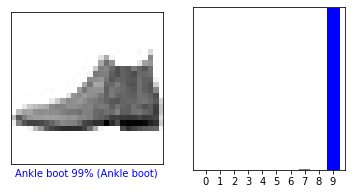

In [39]:
## Verify predictions

#With the model trained, you can use it to make predictions about some images.
#Correct prediction labels are blue and incorrect prediction labels are red. 
#The number gives the percentage (out of 100) for the predicted label.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

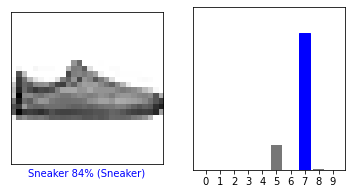

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

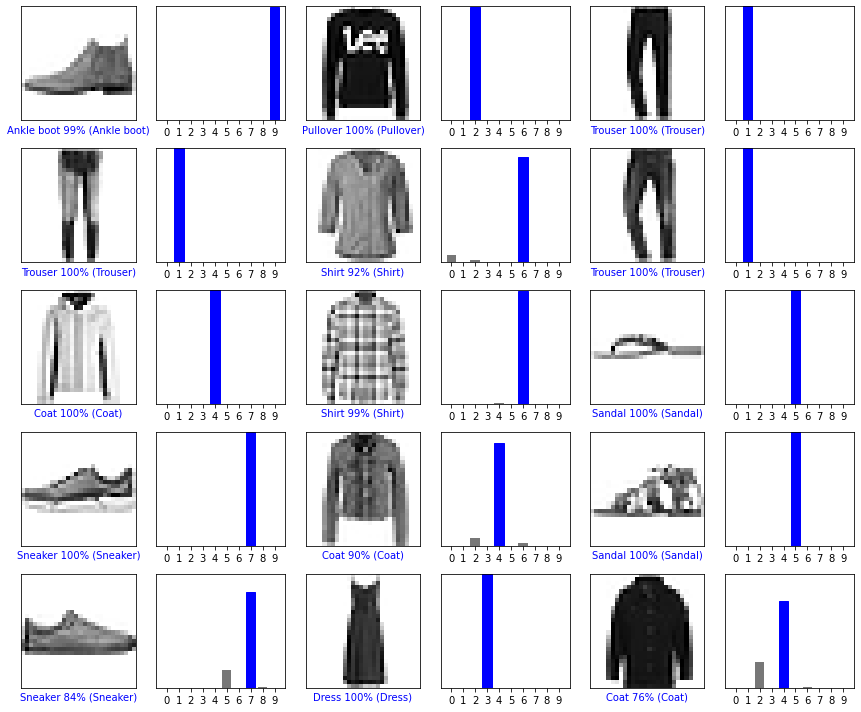

In [41]:
##Let's plot several images with their predictions. 

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [42]:
## Use the trained model to make a prediction about a single image
# Grab an image from the test dataset:
img = test_images[1]
print(img.shape)

(28, 28)


In [43]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [44]:
#Now predict the correct label for this image:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[4.3352549e-05 2.4939824e-13 9.9763429e-01 1.0687119e-12 2.0655340e-03
  1.3006972e-10 2.5679648e-04 4.6618877e-17 6.8807865e-10 2.8538810e-15]]


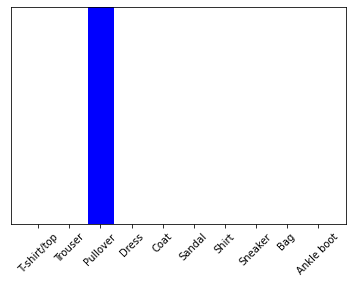

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. 
#Grab the predictions for our (only) image in the batch:

In [46]:
np.argmax(predictions_single[0])

2